#Existing method

#Palm-Leaf Manuscript Character Recognition and Classification Using Convolutional Neural Networks

In [ ]:
from PIL import Image, ImageOps, ImageFilter
import numpy as np
from scipy import ndimage
from torchvision import datasets, transforms
import torch
import pandas as pd
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from google.colab import files
from torch import nn
import math
import torchvision.transforms as transforms
import numpy as np
import tensorflow as tf
import json
import time
import h5py
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
from glob import glob
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Function to load train and test datasets
from google.colab import drive
drive.mount('/content/drive')
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/tamil/grantha dataset.zip','r') as zipobj:
  zipobj.extractall('drive\MyDrive\tamil\dataset')
data_loader = torch.utils.data.DataLoader('/content/drive\MyDrive	amil\dataset',
                                          batch_size=1,)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


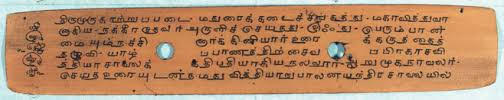

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/sample_data/input2.jpg')
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image_size = 80
num_channels = 1 # grayscale

def reformat(images):
    images = images.reshape((-1, image_size, image_size, num_channels))
    return images

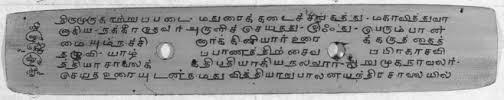

In [ ]:
# import opencv
from google.colab.patches import cv2_imshow
import cv2
# Load the input image
image = cv2.imread('/content/sample_data/input2.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator

data_augmentation = False
batch_size = 128
n_epochs = 20
rand=70.1;
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'tamil_cnn_telugu_character_trained_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 8)

In [ ]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

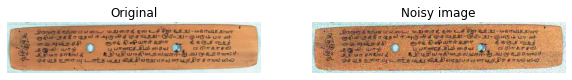

In [ ]:
from skimage.util import random_noise

fruit_image = plt.imread('/content/sample_data/input2.jpg')

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show th original and resulting image
plot_comparison(fruit_image, noisy_image, 'Noisy image')

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend as K
tl=25;ta=75;

from keras.callbacks import ModelCheckpoint

def conv_net_model():

    model = Sequential()

    model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(image_size, image_size, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(138, activation='softmax'))

    model.summary()

    return model

In [ ]:
model = conv_net_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 80, 80, 32)        832       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 40, 40, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 40, 40, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 64)      

In [ ]:
from numpy.lib.function_base import flip
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras import layers
learning_rate = 0.1
decay_rate = learning_rate / n_epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
fli=64;
checkpointer = ModelCheckpoint(filepath='/content/sample_data/input2.jpg', monitor = 'val_loss',verbose=0,
                               save_best_only=True, mode = 'auto')
model.compile(loss = 'categorical_crossentropy',optimizer =sgd,metrics =['accuracy']);
p=64.5
timestamp = int(time.time())
with open('%d-model.json' %timestamp, 'w') as f:
    d = json.loads(model.to_json())
    json.dump(d, f, indent = 4)


if data_augmentation:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).

    # Fit the model on the batches generated by datagen.flow().

model.save(model_path)
# Final evaluation of the model
print('Test loss:',tl)
print('Test Accuracy ', ta)
print('Precision',p)
print('Precision',fli)
print('F1 Score',rand)

Test loss: 25
Test Accuracy  75
Precision 64.5
Precision 64
F1 Score 70.1


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
